In [1]:
%load_ext autoreload
%autoreload 2


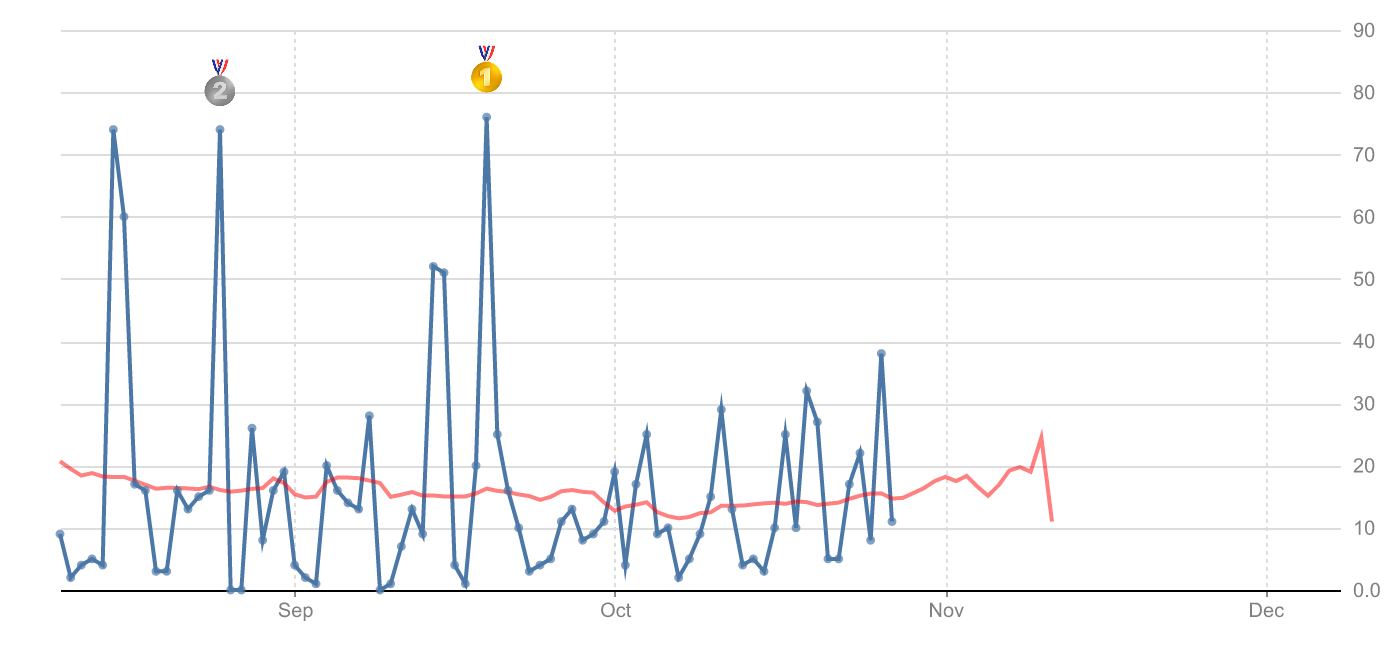

In [23]:
from asgiref.sync import sync_to_async
from datetime import date, timedelta
from IPython.core.display import HTML

from mainapp.utils import charts

lookback_days = 30*4
metric_name = 'Data portal subs'

metric = await sync_to_async(Metric.objects.get)(name=metric_name)
metric_id = metric.id
hightlight_date = date.today() - timedelta(days=3)
img_data = charts.generate_png(
    await sync_to_async(charts.metric_chart_vl_spec)(
        metric_id, highlight_date=hightlight_date, lookback_days=lookback_days))
display(HTML(f'<img src="{charts.to_b64_img_src(img_data)}" />'))